In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.MM_estimation import estimate_w_factor_loading, calc_variance_of_default_rate
from src.ML_estimation import calculate_my_likelihood_arr
from src.ML_estimation import ml_estimation_linear_with_w_and_g
from src.ML_estimation import parameter_estimation
from src.variable_change import a_calc_func, b_calc_func, w_calc_func, gamma_calc_func
from src.ML_estimation import calculate_variable_changed_likelihood_arr
from src.sucess_probability import p_g
from scipy.optimize import minimize

In [2]:
# Load the data
grades_data = pd.read_csv('data/grades_hist_pd.csv', sep=';', index_col=0)

for col_name in grades_data.columns:
    grades_data[col_name] = grades_data[col_name] / 100
    
grades_cols = grades_data.columns

In [3]:
grades_data.head()

,AAA,AA,A,BBB,BB,B,CCC/C
Year,,,,,,,
1981,0.0,0.0,0.0000,0.0000,0.0000,0.0233,0.0000
1982,0.0,0.0,0.0021,0.0035,0.0424,0.0318,0.2143
1983,0.0,0.0,0.0000,0.0034,0.0116,0.0470,0.0667
1984,0.0,0.0,0.0000,0.0068,0.0114,0.0349,0.2500
1985,0.0,0.0,0.0000,0.0000,0.0150,0.0653,0.1538


In [4]:
# Assumption every grade has 10000 obligors
n_g_assumption = 3000

In [5]:
for col_name in grades_cols:
    grades_data[str(col_name) + " defaults"] = (n_g_assumption * grades_data[col_name])

In [6]:
grades_data

,AAA,AA,A,BBB,BB,B,CCC/C,AAA defaults,AA defaults,A defaults,BBB defaults,BB defaults,B defaults,CCC/C defaults
Year,,,,,,,,,,,,,,
1981,0.0,0.0000,0.0000,0.0000,0.0000,0.0233,0.0000,0.0,0.0,0.0,0.0,0.0,69.9,0.0
1982,0.0,0.0000,0.0021,0.0035,0.0424,0.0318,0.2143,0.0,0.0,6.3,10.5,127.2,95.4,642.9
1983,0.0,0.0000,0.0000,0.0034,0.0116,0.0470,0.0667,0.0,0.0,0.0,10.2,34.8,141.0,200.1
1984,0.0,0.0000,0.0000,0.0068,0.0114,0.0349,0.2500,0.0,0.0,0.0,20.4,34.2,104.7,750.0
1985,0.0,0.0000,0.0000,0.0000,0.0150,0.0653,0.1538,0.0,0.0,0.0,0.0,45.0,195.9,461.4
1986,0.0,0.0000,0.0018,0.0034,0.0133,0.0845,0.2308,0.0,0.0,5.4,10.2,39.9,253.5,692.4
1987,0.0,0.0000,0.0000,0.0000,0.0038,0.0313,0.1228,0.0,0.0,0.0,0.0,11.4,93.9,368.4
1988,0.0,0.0000,0.0000,0.0000,0.0105,0.0368,0.2037,0.0,0.0,0.0,0.0,31.5,110.4,611.1
1989,0.0,0.0000,0.0018,0.0061,0.0073,0.0340,0.3333,0.0,0.0,5.4,18.3,21.9,102.0,999.9


In [7]:
grades_data.iloc[:, -5:].sum(axis=0)

A defaults           63.6
BBB defaults        233.7
BB defaults        1026.9
B defaults         5029.5
CCC/C defaults    29903.1
dtype: float64

In [8]:
num_of_rows = grades_data.shape[0]
n_g_over_time = [n_g_assumption] * grades_data.shape[0]

In [9]:
# Choose last four columns and calculate the sum of defaults
d_g = grades_data.iloc[:, -5:].sum(axis=0).tolist()
d_g = [int(round(x)) for x in d_g]
n_g = [n_g_assumption * grades_data.shape[0]] * len(d_g)

In [10]:
d_g, n_g

([64, 234, 1027, 5030, 29903], [120000, 120000, 120000, 120000, 120000])

In [11]:
# MM for A, BBB, BB, B, CCC/C
# Call estimate_w_factor_loading function for each grade
num_of_rows = grades_data.shape[0]
n_g_over_time = np.array([n_g_assumption] * num_of_rows)

MM_params = {}
for grade in ["A", "BBB", "BB", "B", "CCC/C"]:
    MM_params[grade] = estimate_w_factor_loading(grades_data[grade], n_g_over_time, initial_guess=0.45)
    print(f"Estimated parameters with method of moments for grade {grade}:", MM_params[grade][0], norm.ppf(MM_params[grade][1]))

Estimated parameters with method of moments for grade A: 0.08840467326136718 -3.274097580352716
Estimated parameters with method of moments for grade BBB: 0.09821019378284787 -2.8865426119490847
Estimated parameters with method of moments for grade BB: 0.12221489166349328 -2.3842278912651227
Estimated parameters with method of moments for grade B: 0.10813871371837049 -1.728911139866942
Estimated parameters with method of moments for grade CCC/C: 0.13016212757270598 -0.6770330266259245


In [12]:
MM_params_for_A_grade = estimate_w_factor_loading(grades_data["A"], n_g_over_time, initial_guess=0.45)
print(f"Estimated parameters with method of moments for grade A:", MM_params_for_A_grade[0], norm.ppf(MM_params_for_A_grade[1]), MM_params_for_A_grade[1])

Estimated parameters with method of moments for grade A: 0.08840467326136718 -3.274097580352716 0.0005299999999999999


In [13]:
MM_params_for_A_grade = estimate_w_factor_loading(grades_data["A"], n_g_over_time, initial_guess=0.1)
print(f"Estimated parameters with method of moments for grade A:", MM_params_for_A_grade[0], norm.ppf(MM_params_for_A_grade[1]), MM_params_for_A_grade[1])

Estimated parameters with method of moments for grade A: 0.1 -3.274097580352716 0.0005299999999999999


In [14]:
MM_params

{'A': (0.08840467326136718, 0.0005299999999999999),
 'BBB': (0.09821019378284787, 0.0019475),
 'BB': (0.12221489166349328, 0.0085575),
 'B': (0.10813871371837049, 0.041912500000000005),
 'CCC/C': (0.13016212757270598, 0.2491925)}

In [15]:
historical_pd = grades_data["CCC/C"]
#historical_pd = grades_data["A"]
pd_average = np.mean(historical_pd)

expected_value_of_reciprocal_n_g = np.mean(1 / n_g_over_time)

variance_of_p_d = (np.var(historical_pd) - expected_value_of_reciprocal_n_g * pd_average * (1 - pd_average)) / (
                1 - expected_value_of_reciprocal_n_g)

try:
    calc_variance_of_default_rate(1.0, pd_average)
except ValueError as e:
    print(e)

When `allow_singular is False`, the input matrix must be symmetric positive definite.


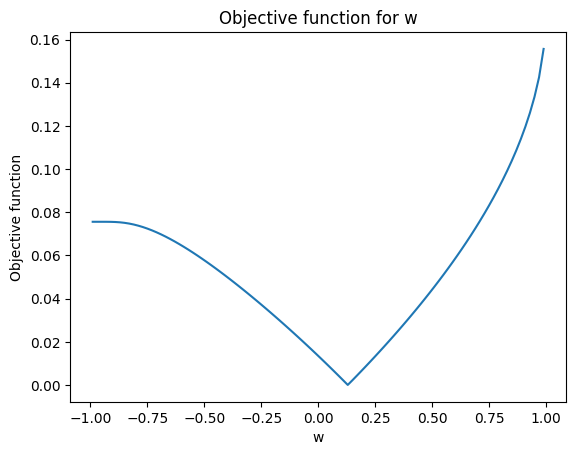

In [16]:
object_function = lambda w: abs(calc_variance_of_default_rate(w, pd_average) - variance_of_p_d)

# Plot the objective function from -0.99 to 0.99
w_values = np.linspace(-0.99, 0.99, 100)
objective_values = [object_function(w) for w in w_values]

plt.plot(w_values, objective_values)
plt.xlabel("w")
plt.ylabel("Objective function")
plt.title("Objective function for w")
plt.show()

In [17]:
# gamma init equals to norm.ppf(MM_params values[1])
gamma_init = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
w_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
#w_init = [0.1, 0.1, 0.1, 0.1, 0.1]

ML_estimation = parameter_estimation(d_g, n_g, w_init, gamma_init)
ML_params = ML_estimation.x
print("Estimated parameters with maximum likelihood method:", ML_params)
print("Current function value:", ML_estimation.fun)

Estimated parameters with maximum likelihood method: [-3.24886659 -2.85224204 -2.38067939 -1.72887898 -0.67760216  0.14853165
  0.1837158  -0.02977168  0.1006333   0.00677108]
Current function value: 25.057460665352874


In [ ]:
# gamma init equals to norm.ppf(MM_params values[1])
gamma_init = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
w_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
#w_init = [0.1, 0.1, 0.1, 0.1, 0.1]

ML_estimation = parameter_estimation(d_g, n_g, w_init, gamma_init)
ML_params = ML_estimation.x
print("Estimated parameters with maximum likelihood method:", ML_params)
print("Current function value:", ML_estimation.fun)

In [59]:
gamma_init

[-3.274097580352716,
 -2.8865426119490847,
 -2.3842278912651227,
 -1.728911139866942,
 -0.6770330266259245]

In [60]:
[MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]

[0.08840467326136718,
 0.09821019378284787,
 0.12221489166349328,
 0.10813871371837049,
 0.13016212757270598]

In [66]:
ML_linear_estimation = ml_estimation_linear_with_w_and_g(d_g, n_g, np.array([0.1]), gamma_init)
print("Estimated parameters with maximum likelihood method:", ML_linear_estimation[0], ML_linear_estimation[1])
print("Current function value:", ML_linear_estimation[2].fun)

Estimated parameters with maximum likelihood method: [ 0.19944905  0.06233111  0.02654434 -0.008197   -0.00035492] [-3.31982403 -2.91518947 -2.39704222 -1.72447598 -0.67705091]
Current function value: 24.232818680568467


In [67]:
ML_linear_estimation = ml_estimation_linear_with_w_and_g(d_g, n_g, np.array([0.2]), gamma_init)
print("Estimated parameters with maximum likelihood method:", ML_linear_estimation[0], ML_linear_estimation[1])
print("Current function value:", ML_linear_estimation[2].fun)

Estimated parameters with maximum likelihood method: [ 0.4735079   0.09477068  0.21911748  0.10681962 -0.00521984] [-3.02343138 -2.90145228 -2.391375   -1.7507569  -0.67546745]
Current function value: 25.570135659458256


In [ ]:
ML_linear_estimation = ml_estimation_linear_with_w_and_g(d_g, n_g, np.array([0.2]), gamma_init)
print("Estimated parameters with maximum likelihood method:", ML_linear_estimation[0], ML_linear_estimation[1])
print("Current function value:", ML_linear_estimation[2].fun)

In [52]:
log_likelihood_MM = -np.log(calculate_my_likelihood_arr(
    d_g, n_g, p_g, norm.pdf, w_init, gamma_init
))
print("Log likelihood for MM estimation:", log_likelihood_MM)

Log likelihood for MM estimation: 26.785673282153493


In [53]:
ML_linear_estimation_fixed_gamma = ml_estimation_linear_with_w_and_g(d_g, n_g, w_init, gamma_init, fixed_g=True)
print("Estimated parameters with maximum likelihood method:", ML_linear_estimation_fixed_gamma[0], ML_linear_estimation_fixed_gamma[1])
print("Current function value:", ML_linear_estimation_fixed_gamma[2].fun)

Estimated parameters with maximum likelihood method: [0.01362295 0.01343891 0.01682429 0.00957589 0.00543081] [-3.28666221 -2.90030289 -2.40189585 -1.73902986 -0.68283208]
Current function value: 23.64380847029618


In [62]:
gamma_init

[-3.274097580352716,
 -2.8865426119490847,
 -2.3842278912651227,
 -1.728911139866942,
 -0.6770330266259245]

In [63]:
[gamma + 1 for gamma in gamma_init]

[-2.274097580352716,
 -1.8865426119490847,
 -1.3842278912651227,
 -0.7289111398669419,
 0.32296697337407554]

C:\Users\kissp\AppData\Local\Temp\ipykernel_21476\3934191927.py:7: RuntimeWarning: divide by zero encountered in log
  log_likelihood_values.append(-np.log(calculate_my_likelihood_arr(d_g, n_g, p_g, norm.pdf, [w], gamma_init2)))


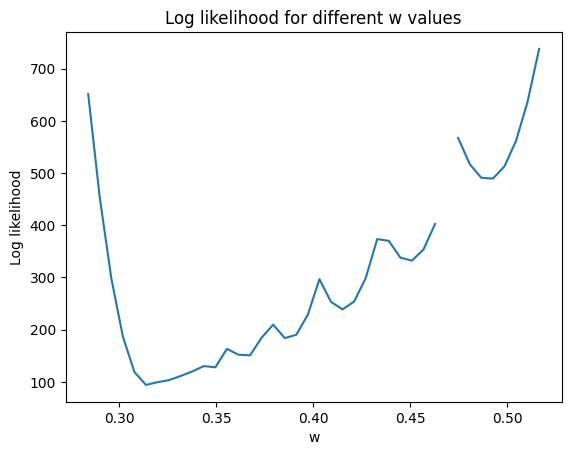

In [64]:
# Plot log likelihood for different w values if gamma is fixed
w_values = np.linspace(0.01, 0.6, 100)
log_likelihood_values = []
gamma_init2 = [gamma + 1 for gamma in gamma_init]

for w in w_values:
    log_likelihood_values.append(-np.log(calculate_my_likelihood_arr(d_g, n_g, p_g, norm.pdf, [w], gamma_init2)))

plt.plot(w_values, log_likelihood_values)
plt.xlabel("w")
plt.ylabel("Log likelihood")
plt.title("Log likelihood for different w values")
plt.show()

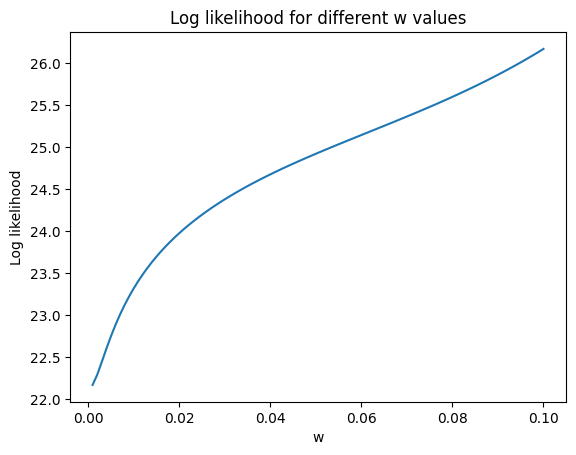

In [19]:
# Plot log likelihood for different w values if gamma is fixed
w_values = np.linspace(0.001, 0.1, 100)
log_likelihood_values = []

for w in w_values:
    log_likelihood_values.append(-np.log(calculate_my_likelihood_arr(d_g, n_g, p_g, norm.pdf, [w], gamma_init)))

plt.plot(w_values, log_likelihood_values)
plt.xlabel("w")
plt.ylabel("Log likelihood")
plt.title("Log likelihood for different w values")
plt.show()

C:\Users\kissp\AppData\Local\Temp\ipykernel_21476\547271247.py:14: RuntimeWarning: divide by zero encountered in log
  z_values[i, j] = -np.log(calculate_my_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, w_fixed, [x, y]))


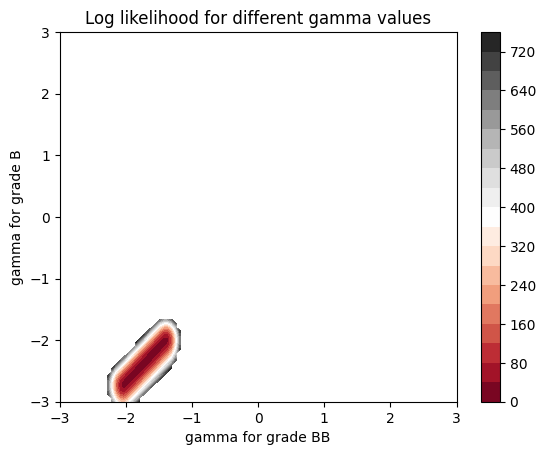

In [20]:
# Choose 2 grades: B and BB
d_g2 = [d_g[2], d_g[3]]
n_g2 = [n_g[2], n_g[3]]

# Make a 2D plot conjecturing the log likelihood function in gamma direction for fixed w
# where fixed w come from MM estimation
w_fixed = [MM_params[grade][0] for grade in ["BB", "B"]]
x_gamma_values = np.linspace(-3, 3, 100)
y_gamma_values = np.linspace(-3, 3, 100)
z_values = np.zeros((len(x_gamma_values), len(y_gamma_values)))

for i, x in enumerate(x_gamma_values):
    for j, y in enumerate(y_gamma_values):
        z_values[i, j] = -np.log(calculate_my_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, w_fixed, [x, y]))

plt.contourf(x_gamma_values, y_gamma_values, z_values, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("gamma for grade BB")
plt.ylabel("gamma for grade B")
plt.title("Log likelihood for different gamma values")
plt.show()

In [21]:
# Make a dataframe from z_values
z_values_df = pd.DataFrame(z_values, index=x_gamma_values, columns=y_gamma_values)
z_values_df

,-3.000000,-2.939394,-2.878788,-2.818182,-2.757576,-2.696970,-2.636364,-2.575758,-2.515152,-2.454545,...,2.454545,2.515152,2.575758,2.636364,2.696970,2.757576,2.818182,2.878788,2.939394,3.000000
-3.000000,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
-2.939394,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
-2.878788,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
-2.818182,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
-2.757576,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.757576,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2.818182,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2.878788,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2.939394,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


C:\Users\kissp\AppData\Local\Temp\ipykernel_21476\3647041123.py:14: RuntimeWarning: divide by zero encountered in log
  z_values[i, j] = -np.log(calculate_my_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, w_fixed, [x, y]))


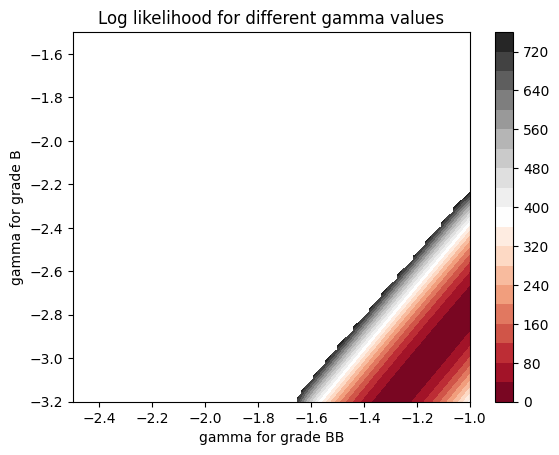

In [24]:
# Choose 2 grades: B and BB
d_g2 = [d_g[2], d_g[3]]
n_g2 = [n_g[2], n_g[3]]

# Make a 2D plot conjecturing the log likelihood function in gamma direction for fixed w
# where fixed w come from MM estimation
w_fixed = [MM_params[grade][0] for grade in ["BB", "B"]]
x_gamma_values = np.linspace(-2.5, -1, 100)
y_gamma_values = np.linspace(-3.2, -1.5, 100)
z_values = np.zeros((len(x_gamma_values), len(y_gamma_values)))

for i, x in enumerate(x_gamma_values):
    for j, y in enumerate(y_gamma_values):
        z_values[i, j] = -np.log(calculate_my_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, w_fixed, [x, y]))

plt.contourf(x_gamma_values, y_gamma_values, z_values, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("gamma for grade BB")
plt.ylabel("gamma for grade B")
plt.title("Log likelihood for different gamma values")
plt.show()

C:\Users\kissp\AppData\Local\Temp\ipykernel_21476\814709574.py:14: RuntimeWarning: divide by zero encountered in log
  z_values[i, j] = -np.log(calculate_my_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, w_fixed, [x, y]))


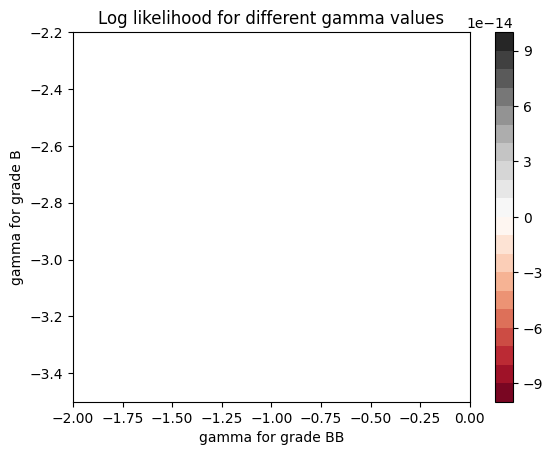

In [25]:
# Choose 2 grades: B and BB
d_g2 = [d_g[2], d_g[3]]
n_g2 = [n_g[2], n_g[3]]

# Make a 2D plot conjecturing the log likelihood function in gamma direction for fixed w
# where fixed w come from MM estimation
w_fixed = [MM_params[grade][0] for grade in ["BB", "B"]]
x_gamma_values = np.linspace(-2, 0, 100)
y_gamma_values = np.linspace(-3.5, -2.2, 100)
z_values = np.zeros((len(x_gamma_values), len(y_gamma_values)))

for i, x in enumerate(x_gamma_values):
    for j, y in enumerate(y_gamma_values):
        z_values[i, j] = -np.log(calculate_my_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, w_fixed, [x, y]))

plt.contourf(x_gamma_values, y_gamma_values, z_values, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("gamma for grade BB")
plt.ylabel("gamma for grade B")
plt.title("Log likelihood for different gamma values")
plt.show()

In [70]:
[norm.ppf(MM_params[grade][1]) for grade in ["BB", "B"]]

[-2.3842278912651227, -1.728911139866942]

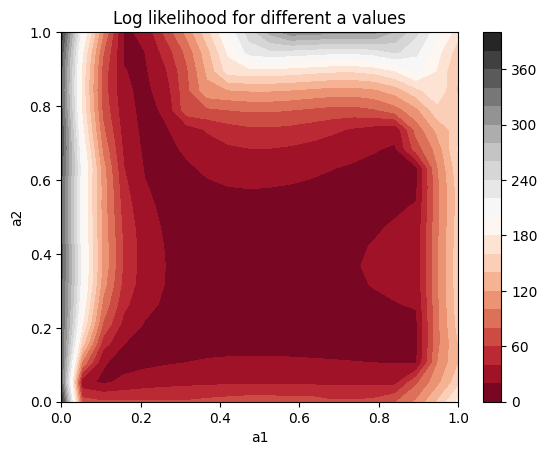

In [74]:
# Choose 2 grades: B and BB
d_g2 = [d_g[2], d_g[3]]
n_g2 = [n_g[2], n_g[3]]

# Fixed gamma
#gamma_fixed = [norm.ppf(MM_params[grade][1]) for grade in ["BB", "B"]]
gamma_fixed = [-2.5, -1.9]

# Make a 2D plot conjecturing the log likelihood function in a1, a2 direction for fixed gamma
a1 = np.linspace(0, 1, 20)
w1 = w_calc_func(a1, gamma_fixed[0])
a2 = np.linspace(0, 1, 20)
w2 = w_calc_func(a2, gamma_fixed[1])

b1 = gamma_fixed[0] / np.sqrt(1 - w1 ** 2)
b2 = gamma_fixed[1] / np.sqrt(1 - w2 ** 2)

z_values = np.zeros((len(a1), len(a2)))

for i, x in enumerate(a1):
    for j, y in enumerate(a2):
        z_values[i, j] = -np.log(calculate_variable_changed_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, np.array([a1[i], a2[j]]), np.array([b1[i], b2[j]])))

plt.contourf(a1, a2, z_values, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("a1")
plt.ylabel("a2")
plt.title("Log likelihood for different a values")
plt.show()

In [77]:
norm.ppf(MM_params[grade][1])

-0.6770330266259245

In [80]:
MM_params[grade][0]

0.13016212757270598

C:\Users\kissp\AppData\Local\Temp\ipykernel_21476\4120952430.py:26: RuntimeWarning: divide by zero encountered in log
  z_values[i, j] = -np.log(calculate_variable_changed_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, np.array([a[i], a[i]]), np.array([b1, b2[j]])))


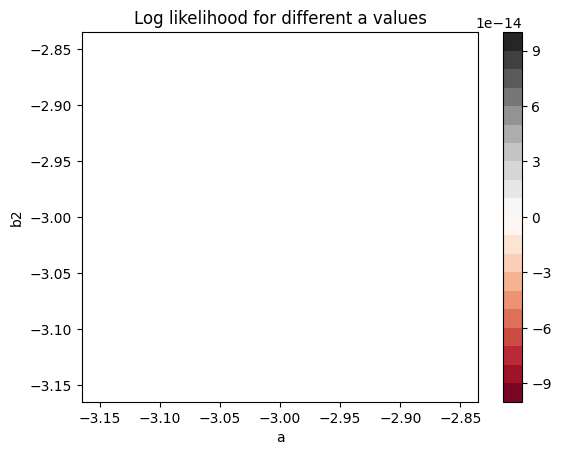

In [82]:
# 1 w and 2 gamma
# Choose 2 grades: B and BB
d_g2 = [d_g[2], d_g[3]]
n_g2 = [n_g[2], n_g[3]]

# Fixed b1

gamma_fixed = [-2.5, -1.9]
#b1 = norm.ppf(MM_params[grade][1])
b1 = b_calc_func(MM_params[grade][0], norm.ppf(MM_params[grade][1]))

# Make a 2D plot conjecturing the log likelihood function in a1, a2 direction for fixed gamma
a = np.linspace(-3, -3, 20)
#w = w_calc_func(a1, gamma_fixed[0])
b2 = np.linspace(-3, -3, 20)
# a2 = np.linspace(0, 1, 20)
# w2 = w_calc_func(a2, gamma_fixed[1])

# b1 = gamma_fixed[0] / np.sqrt(1 - w1 ** 2)
# b2 = gamma_fixed[1] / np.sqrt(1 - w2 ** 2)

z_values = np.zeros((len(a), len(b2)))

for i, x in enumerate(a):
    for j, y in enumerate(b2):
        z_values[i, j] = -np.log(calculate_variable_changed_likelihood_arr(d_g2, n_g2, p_g, norm.pdf, np.array([a[i], a[i]]), np.array([b1, b2[j]])))

plt.contourf(a, b2, z_values, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b2")
plt.title("Log likelihood for different a values")
plt.show()

In [73]:
z_values

array([[         inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf, 474.50131082,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf],
       [         inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf, 167.3432678 ,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf],
       [         inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,  93.08789122,          inf,          inf,
                 inf,          inf,          inf,          inf,
                 inf,          inf,          inf,          inf],
       [         inf,          inf,  

In [54]:
from scipy.stats import binom
from scipy.integrate import quad

prob_dens_func = lambda x: norm.pdf(x)

integrand = lambda x: np.prod(binom.pmf(d_g, n_g, p_g(x, w_init, gamma_init))) * prob_dens_func(x)

quad(integrand, -3, 3)

(2.328787704727134e-12, 4.428034568118371e-12)

In [55]:
quad(integrand, -3, 3, epsrel=1.49e-24)

(2.328787704727134e-12, 4.428034568118371e-12)

In [56]:
quad(integrand, -3, 3, epsabs=1.49e-28)

(2.7100952743182037e-12, 6.429944793199329e-23)

In [57]:
quad(integrand, -5, 5)

(3.6119107723598606e-12, 7.063795862818002e-12)

In [58]:
quad(integrand, -5, 5, epsabs=1.49e-28)

(2.7100952743203997e-12, 3.449782153040557e-21)

In [34]:
-np.log(calculate_my_likelihood_arr(d_g, n_g, p_g, norm.pdf, w_init[0], gamma_init))

25.816785608467388

In [35]:
-np.log(calculate_my_likelihood_arr(d_g, n_g, p_g, norm.pdf, [0], gamma_init))

22.11912730829603

## Fixed w case

In [36]:
# Init comes from MM all grdades
w_fixed_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
gamma_init = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]

ML_linear_estimation_fixed_w = ml_estimation_linear_with_w_and_g(d_g, n_g, w_fixed_init, gamma_init, fixed_w=True)

In [38]:
ML_linear_estimation_fixed_w[0], ML_linear_estimation_fixed_w[1]

(array([0.08840467, 0.09821019, 0.12221489, 0.10813871, 0.13016213]),
 array([-3.25948922, -2.8721767 , -2.36630475, -1.71870883, -0.67125024]))

In [42]:
ML_linear_estimation_fixed_w[2].fun

25.785366136088353

In [40]:
gamma_init

[-3.274097580352716,
 -2.8865426119490847,
 -2.3842278912651227,
 -1.728911139866942,
 -0.6770330266259245]

In [45]:
# Init comes from MM all grades
w_fixed_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
gamma_init2 = np.array([-3, -2.7, -2.3, -1.7, -0.7])

ML_linear_estimation_fixed_w2 = ml_estimation_linear_with_w_and_g(d_g, n_g, w_fixed_init, gamma_init2, fixed_w=True)

ML_linear_estimation_fixed_w2[0], ML_linear_estimation_fixed_w2[1]

(array([0.08840467, 0.09821019, 0.12221489, 0.10813871, 0.13016213]),
 array([-3.24685305, -2.85847304, -2.34920324, -1.70351501, -0.6530101 ]))

In [46]:
ML_linear_estimation_fixed_w2[2].fun

25.795266213895015

In [51]:
# Init comes from MM all grades
w_fixed_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
gamma_init3 = np.array([-3.01, -2.7, -2.3, -1.7, -0.7])

ML_linear_estimation_fixed_w3 = ml_estimation_linear_with_w_and_g(d_g, n_g, w_fixed_init, gamma_init3, fixed_w=True)

print("Estimated parameters with maximum likelihood method:", ML_linear_estimation_fixed_w3[0], ML_linear_estimation_fixed_w3[1])
print("Current function value:", ML_linear_estimation_fixed_w3[2].fun)

Estimated parameters with maximum likelihood method: [0.08840467 0.09821019 0.12221489 0.10813871 0.13016213] [-3.25947637 -2.87216739 -2.3662951  -1.7187032  -0.6712467 ]
Current function value: 25.785366298301344


In [61]:
w_fixed_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
#gamma_init4 = np.array([-1.5, -1.5, -1.5, -1.5, -1.5])
gamma_init4 = np.array([0, 0, 0, 0, 0])

ML_linear_estimation_fixed_w4 = ml_estimation_linear_with_w_and_g(d_g, n_g, w_fixed_init, gamma_init4, fixed_w=True)

print("Estimated parameters with maximum likelihood method:", ML_linear_estimation_fixed_w4[0], ML_linear_estimation_fixed_w4[1])
print("Current function value:", ML_linear_estimation_fixed_w4[2].fun)

C:\Users\kissp\PycharmProjects\VasicekPDModell\src\ML_estimation.py:271: RuntimeWarning: divide by zero encountered in log
  objective_function = lambda params: -np.log(calculate_variable_changed_likelihood_arr(
C:\Users\kissp\PycharmProjects\VasicekPDModell\venv\lib\site-packages\scipy\optimize\_optimize.py:941: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Estimated parameters with maximum likelihood method: [0.08840467 0.09821019 0.12221489 0.10813871 0.13016213] [0. 0. 0. 0. 0.]
Current function value: inf


## Fixed gamma case

In [68]:
w_init

[0.08840467326136718,
 0.09821019378284787,
 0.12221489166349328,
 0.10813871371837049,
 0.13016212757270598]

In [52]:
# Init comes from MM all grades
w_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
gamma_fixed = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]

ML_linear_estimation_fixed_gamma = ml_estimation_linear_with_w_and_g(d_g, n_g, w_init, gamma_fixed, fixed_g=True)

In [53]:
print("Estimated parameters with maximum likelihood method:", ML_linear_estimation_fixed_gamma[0], ML_linear_estimation_fixed_gamma[1])
print("Current function value:", ML_linear_estimation_fixed_gamma[2].fun)

Estimated parameters with maximum likelihood method: [0.01356762 0.01345452 0.0167972  0.00953749 0.0054181 ] [-3.28666469 -2.90030228 -2.40189695 -1.7390305  -0.68283213]
Current function value: 23.643810895248325


In [ ]:
# Init comes from MM all grades
w_init = [MM_params[grade][0] for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
gamma_fixed = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]

ML_linear_estimation_fixed_gamma = ml_estimation_linear_with_w_and_g(d_g, n_g, w_init, gamma_fixed, fixed_g=True)

In [125]:
w_init

array([0.13])

In [31]:
w_init = [0.1, 0.1, 0.1, 0.1, 0.1]

ML_estimation2 = parameter_estimation(d_g, n_g, w_init, gamma_init)
ML_estimation2.x

array([-3.17998169e+00, -2.80911069e+00, -2.35565584e+00, -1.73165322e+00,
       -6.77125930e-01,  1.54954326e-01,  1.43551223e-01,  6.89628218e-02,
       -6.89517068e-03,  3.50823784e-04])

In [33]:
ML_estimation2.fun

24.519007807071002

In [34]:
gamma_init = [norm.ppf(MM_params[grade][1]) for grade in ["A", "BBB", "BB", "B", "CCC/C"]]
w_init = [0.1, 0.1, 0.1, 0.1, 0.1]

ML_estimation2 = ml_estimation_linear_with_w_and_g(d_g, n_g, w_init, gamma_init)
print("Estimated parameters with maximum likelihood method:", ML_estimation2[0], ML_estimation2[1])
print("Current function value:", ML_estimation2[2].fun)

Estimated parameters with maximum likelihood method: [0.35230813 0.02622566 0.04965887 0.00652571 0.01386929] [-3.11502559 -2.88823288 -2.38888556 -1.72942717 -0.67913314]
Current function value: 24.62834464573233


In [36]:
-np.log(calculate_my_likelihood_arr(d_g, n_g, p_g, norm.pdf, ML_estimation2[0], ML_estimation2[1]))

24.62834464573233

In [23]:
# Change the initial guess for w from 0.05 to 0.25 with step 0.005
w_values = np.linspace(0.05, 0.25, 41)
ML_params_for_w = []
for w in w_values:
    ML_estimation_w = parameter_estimation(d_g, n_g, [w], gamma_init)
    ML_params_for_w.append(ML_estimation_w.x)

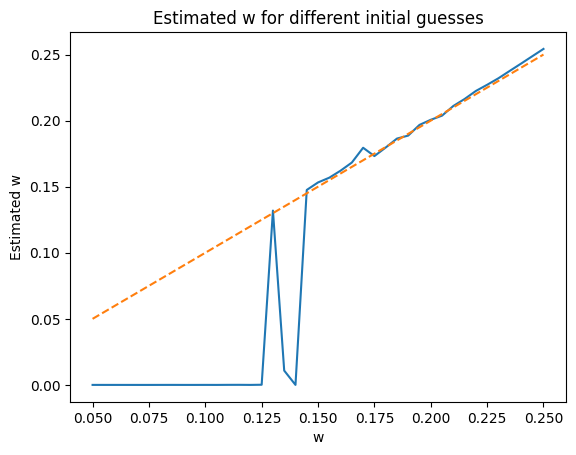

In [24]:
# Plot the results
plt.plot(w_values, [x[5] for x in ML_params_for_w])
# add f(x) = x line
plt.plot(w_values, w_values, linestyle='dashed')
plt.xlabel("w")
plt.ylabel("Estimated w")
plt.title("Estimated w for different initial guesses")
plt.show()

In [53]:
w_value = 0.13
ML_estimation_w = ml_estimation_linear_with_w_and_g(d_g, n_g, [w_value], gamma_init)

C:\Users\kissp\PycharmProjects\VasicekPDModell\src\ML_estimation.py:251: RuntimeWarning: divide by zero encountered in log
  objective_function = lambda params: -np.log(calculate_variable_changed_likelihood_arr(
C:\Users\kissp\PycharmProjects\VasicekPDModell\venv\lib\site-packages\scipy\optimize\_optimize.py:941: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


In [92]:
w_init = np.array([0.13])

if len(w_init) == 1:
    w_init = np.full_like(gamma_init, w_init[0])
elif len(gamma_init) == 1:
    gamma_list_init = np.full_like(w_init, gamma_init[0])

a_init = np.array(a_calc_func(w_init, gamma_init))
b_init = np.array(b_calc_func(w_init, gamma_init))

initial_guess = np.concatenate((a_init, b_init))

initial_guess

array([-0.13111262, -0.13111262, -0.13111262, -0.13111262, -0.13111262,
       -3.30211939, -2.91124748, -2.40463363, -1.74370826, -0.68282751])

In [97]:
np.array(gamma_init)

array([-3.27409758, -2.88654261, -2.38422789, -1.72891114, -0.67703303])

In [99]:
w_init = np.array([0.13])
gamma_init = np.array(gamma_init)

In [103]:
a_init = np.array(a_calc_func(w_init, gamma_init))
b_init = np.array(b_calc_func(w_init, gamma_init))
a_init, b_init

(array([-0.13111262]),
 array([-3.30211939, -2.91124748, -2.40463363, -1.74370826, -0.68282751]))

In [105]:
w_calc_func(a_init, b_init), gamma_calc_func(a_init, b_init)

(array([0.13]),
 array([-3.27409758, -2.88654261, -2.38422789, -1.72891114, -0.67703303]))

In [106]:
w_init = np.array([0.13])
gamma_init = np.array(gamma_init)


a_init = np.array(a_calc_func(w_init, gamma_init))
b_init = np.array(b_calc_func(w_init, gamma_init))

initial_guess = np.concatenate((a_init, b_init))

num_of_a = len(a_init)
bounds = [(-10, 10)] * len(initial_guess)

objective_function = lambda params: -np.log(calculate_variable_changed_likelihood_arr(
    d_g, n_g, p_g, norm.pdf, params[:num_of_a], params[num_of_a:len(initial_guess)]
))

result = minimize(objective_function,
                  initial_guess,
                  method="Nelder-Mead",
                  bounds=bounds,
                  options={
                      'disp': True})

factor_loading_result = np.array(w_calc_func(np.array(result.x[:num_of_a]), np.array(result.x[num_of_a:])))
gamma_result = np.array(gamma_calc_func(np.array(result.x[:num_of_a]), np.array(result.x[num_of_a:])))

Optimization terminated successfully.
         Current function value: 22.248767
         Iterations: 468
         Function evaluations: 744


In [109]:
log_likelihood_opt = -np.log(calculate_variable_changed_likelihood_arr(
    d_g, n_g, p_g, norm.pdf, result.x[:num_of_a], result.x[num_of_a:len(initial_guess)]
))

log_likelihood_opt

22.24876681795912

In [110]:
# log likelihood for MM estimation
log_likelihood_MM = -np.log(calculate_variable_changed_likelihood_arr(
    d_g, n_g, p_g, norm.pdf, w_init, gamma_init
))

log_likelihood_MM

25.834429903883596

In [107]:
factor_loading_result, gamma_result

(array([-2.65868207e-05]),
 array([-3.26904506, -2.88453358, -2.3854112 , -1.73187698, -0.67649236]))

In [119]:
# w_init = np.array([0.13])
gamma_init = np.array(gamma_init)

a_init = np.array(a_calc_func(w_init, gamma_init))
b_init = np.array(b_calc_func(w_init, gamma_init))

initial_guess = np.concatenate((a_init, b_init))

num_of_a = len(a_init)
bounds = [(-10, 10)] * len(initial_guess)

objective_function = lambda params: -np.log(calculate_variable_changed_likelihood_arr(
    d_g, n_g, p_g, norm.pdf, params[:num_of_a], params[num_of_a:len(initial_guess)]
))

result = minimize(objective_function,
                  initial_guess,
                  method="Nelder-Mead",
                  bounds=bounds,
                  options={
                      'disp': True})

factor_loading_result = np.array(w_calc_func(np.array(result.x[:num_of_a]), np.array(result.x[num_of_a:])))
gamma_result = np.array(gamma_calc_func(np.array(result.x[:num_of_a]), np.array(result.x[num_of_a:])))

Optimization terminated successfully.
         Current function value: 22.248767
         Iterations: 468
         Function evaluations: 744


In [120]:
factor_loading_result, gamma_result

(array([-2.65868207e-05]),
 array([-3.26904506, -2.88453358, -2.3854112 , -1.73187698, -0.67649236]))

In [118]:
factor_loading_result, gamma_result

(array([2.45880548e-06]),
 array([-3.27227494, -2.88610652, -2.38419769, -1.72887816, -0.67703511]))

In [98]:
factor_loading_result, gamma_result

(array([0.13435077, 0.30390894, 0.0510222 , 0.04665423, 0.0006417 ]),
 array([-3.26750789, -2.80524197, -2.39025314, -1.73546621, -0.67714038]))

In [84]:
result.x

array([ 2.65868207e-05, -3.26904506e+00, -2.88453358e+00, -2.38541120e+00,
       -1.73187698e+00, -6.76492360e-01])

In [85]:
result.x[num_of_a:]

array([-3.26904506, -2.88453358, -2.3854112 , -1.73187698, -0.67649236])

In [83]:
zip(result.x[:num_of_a], result.x[num_of_a:])

[(2.658682067754436e-05, -3.2690450607546784)]

In [79]:
num_of_a

1

In [78]:
factor_loading_result, gamma_result

(array([-2.65868207e-05]), array([-3.26904506]))

In [ ]:
a_init = np.array(a_calc_func(w, gamma_init))
b_init = np.array(b_calc_func(w, gamma_init))

initial_guess = np.concatenate((a_init, b_init))

num_of_a = len(a_init)
bounds = [(-10, 10)] * len(initial_guess)

In [55]:
ML_estimation_w[0][0]

0.13

In [111]:
w_values = np.linspace(0.05, 0.25, 41)
ML_params_for_w = []
for w in w_values:
    ML_estimation_w = ml_estimation_linear_with_w_and_g(d_g, n_g, [w], gamma_init)
    ML_params_for_w.append(ML_estimation_w[0][0])

C:\Users\kissp\PycharmProjects\VasicekPDModell\src\ML_estimation.py:251: RuntimeWarning: divide by zero encountered in log
  objective_function = lambda params: -np.log(calculate_variable_changed_likelihood_arr(
C:\Users\kissp\PycharmProjects\VasicekPDModell\venv\lib\site-packages\scipy\optimize\_optimize.py:941: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


KeyboardInterrupt: 

In [ ]:
# Plot the results
plt.plot(w_values, ML_params_for_w)
# add f(x) = x line
plt.plot(w_values, w_values, linestyle='dashed')
plt.xlabel("w")
plt.ylabel("Estimated w")
plt.title("Estimated w for different initial guesses")
plt.show()

In [25]:
ML_estimation_w = parameter_estimation(d_g, n_g, [0.5], gamma_init)

C:\Users\kissp\PycharmProjects\VasicekPDModell\src\ML_estimation.py:185: RuntimeWarning: divide by zero encountered in log
  objective_function = lambda params: -np.log(calculate_my_likelihood_arr(


In [26]:
ML_estimation_w

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 25.056272359217225
             x: [-3.002e+00 -2.667e+00 -2.232e+00 -1.663e+00 -7.509e-01
                  4.976e-01]
           nit: 151
          nfev: 256
 final_simplex: (array([[-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01],
                       [-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01],
                       ...,
                       [-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01],
                       [-3.002e+00, -2.667e+00, ..., -7.509e-01,
                         4.976e-01]]), array([ 2.506e+01,  2.506e+01,  2.506e+01,  2.506e+01,
                        2.506e+01,  2.506e+01,  2.506e+01]))